# Poisson distribution
Recall the formula:
$$
P\left(X = k|{\color{red}{\lambda}}\right) = \frac{e^{-{\color{red}{\lambda}}}{\color{red}{\lambda}}^k}{k!}
$$ 
that calculates the probability of occurrence of $k=0,1,\ldots$ events (photons arrivals, for instance) if the mean number of that events is ${\color{red}{\lambda}}$.

In [20]:
from matplotlib.pyplot import hist, show, title, legend
from numpy.random import poisson, randint
from numpy import sqrt, ones

## Mathemagically...
anscombe = lambda p: 2 * sqrt(p + .375)

## Anscombe $\circ$ Poisson $\approx$ Gauss
Recall now that for a Poissonian r.v. $X$ we have:
$$E(X) = var(X) = {\color{red}{\lambda}}$$
And that the Anscombe's transform 
$$ X = 2\sqrt{X + \frac{3}{8}}$$
turns it into (approximately) Gaussian one with a **constant** (and **known**!) variance, $var(X) = {\color{red}1}$

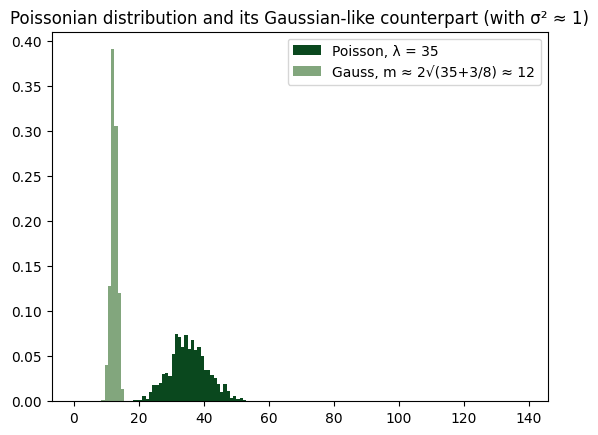

In [27]:
λ, N = randint(0x20, 0x40), 0x400
Λ = λ * ones(N)

P = poisson(Λ)
G = anscombe(P)

_ = (hist((P, G), range(λ << 0b10), density = True, width = 1, color = ['xkcd:pine green', 'xkcd:greyish green']),
     title(f'Poissonian distribution and its Gaussian-like counterpart (with σ² ≈ 1)'),
     legend((f'Poisson, λ = {λ}', f'Gauss, m ≈ 2√({λ}+3/8) ≈ {anscombe(λ):,.0f}')))
show()

From the so called $3\sigma$ rule we can easily infer from $\sigma = 1$ that the histogram of our now-Gaussian r.v. has about six/seven bars...  